# Batch I metadata reading accuracy
For Batch II visit Notebook number 23 via the following link: https://github.com/asc-csa/Alouette_extract/blob/working/23%20-%20Batch%20II%20Image%20Quality%20Analysis%20.ipynb

In [1]:
import matplotlib.pyplot as plt
import glob
import os
import random
from random import randrange
import csv
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from PIL import Image

In [2]:
rootDir = 'L:/DATA/Alouette_I/BATCH_I_Run2/'
imageDir =  rootDir + '04_processed/'
resultDir = rootDir + '07_Accuracy/'
logDir = rootDir + '06_log/'
sample_size = 5

## Num Category

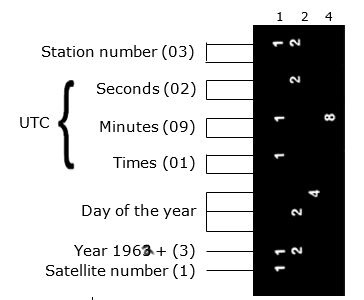

In [3]:
df_master = pd.read_csv(resultDir + 'result_master.csv')
filter_df_num = df_master[df_master['processed_image_class']=='num']
selected_rows_num = filter_df_num.sample(sample_size)
selected_rows_drop = selected_rows_num.drop(['fmin','max_depth','time_quality','Lat','Lng'], axis=1)
print(selected_rows_drop)

          Directory Subdirectory       filename processed_image_class  \
46567   R014207907F          537  Image0352.png                   num   
327119   R014207948       1745-9        123.png                   num   
96328   R014207930F          652  Image0027.png                   num   
44709   R014207907F          532  Image0376.png                   num   
462790   R014207956      2354-1B         87.png                   num   

                  Timestamp  Station_Number Station_Code  \
46567   1965-01-03 18:09:33             5.0          COL   
327119  1966-05-10 20:45:44             9.0          SOL   
96328   1965-04-11 21:02:39             5.0          COL   
44709   1964-12-27 08:27:59             5.0          COL   
462790  1967-03-20 17:17:53             1.0          BPT   

                             Station_Name  
46567         College, Fairbanks, AK, USA  
327119  Falkland Islands (Islas Malvinas)  
96328         College, Fairbanks, AK, USA  
44709         College, F

In [4]:
for _, row in selected_rows_num.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['filename']
    image_path = os.path.join(imageDir, directory, subdirectory, filename)
    
    if os.path.exists(image_path):
        print ("Image Path:", image_path)
        image = Image.open(image_path)
        image.show()
    else: 
        print ("Image not found", image_path)

Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207907F\537\Image0352.png
Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207948\1745-9\123.png
Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207930F\652\Image0027.png
Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207907F\532\Image0376.png
Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207956\2354-1B\87.png


In [5]:
second_data = []
for i in range (5):
    print('\n\n')
    print ("Please read the metadata for each of the 5 images above and the values in the boxes below")
    print ("Write N/A if any of the values were not present or not easy to read.")
    Directory = input ("Add the Directory: ")
    Subdirectory = input("Add the Subdirectory: ")
    filename = input ("Add the png name: ")
    processed_image_class = input ("Add procssed image class: ")
    Timestamp = input ("Add the timestamp in the YY-MM-DD formart: ")
    Station_Number = input ("station number: ")
    second_data.append([Directory, Subdirectory, filename, processed_image_class, Timestamp, Station_Number])
with open ('L:/DATA/Alouette_I/BATCH_I_Run2/07_Accuracy/BatchI_QA.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Directory","Subdirectory", "filename","processed_image_class", "TimeStamp", "Station_Number"])
    for row in second_data:
        #row.insert(0, directory)
        #row.insert (1, subdirectory)
        print(row)
        writer.writerow(row)




Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207907F
Add the Subdirectory: 537
Add the png name: Image0352.png
Add procssed image class: num
Add the timestamp in the YY-MM-DD formart: 1965-01-03 18:09:33
station number: 5



Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207948
Add the Subdirectory: 1745-9
Add the png name: 123.png
Add procssed image class: num
Add the timestamp in the YY-MM-DD formart: 1966-05-10 20:45:44
station number: 9



Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207930F
Add the Subdirectory: 652
Add the png name: Image0027.png
Add procssed image class: num

Total number of NUM scanned Ionograms: 465009
Number of Images Analyzed: 49
Number of ionograms categorized correctly: 45
Estimated Success Rate out of 465009 with consistent results: 427049


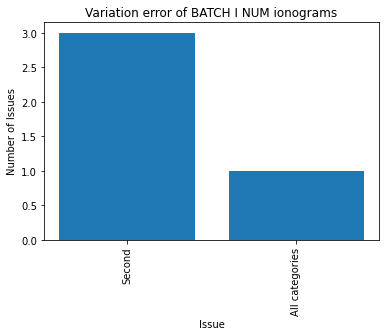

Number of incorrectly analyzed ionograms across all categories: 1
     Directory Subdirectory       filename
3  R014207909F          713  Image0317.png


In [8]:
#Total Number of Num Categories
df_master = pd.read_csv(resultDir + 'result_master.csv')
filter_df_num = df_master[df_master['processed_image_class']=='num']
total_df_master = len(filter_df_num)
print ('Total number of NUM scanned Ionograms:', total_df_master)

#Total number of Ionograms analyzed
df_num = pd.read_csv("L:/DATA/Alouette_I/BATCH_I_Run2/07_Accuracy/BatchI_QA.csv")
total_len = len(df_num)
print ('Number of Images Analyzed:', total_len)


# filtering out correct categories
df_num = df_num.loc[df_num['Issue'] != 'None']
filtered_down_len = len(df_num)
print('Number of ionograms categorized correctly:', total_len - filtered_down_len)

#Estimated success rate
success_rate = (total_len - filtered_down_len)/total_len
Estimation = round(success_rate*total_df_master)
print('Estimated Success Rate out of 465009 with consistent results:', Estimation)

#Plotting the variation of issues
issue_counts_num = df_num["Issue"].value_counts()
plt.bar(issue_counts_num.index, issue_counts_num.values)
plt.title ("Variation error of BATCH I NUM ionograms")
plt.xlabel("Issue")
plt.ylabel("Number of Issues")
plt.xticks(rotation=90)
plt.show()

# Number of All categories error
df_num = df_num.loc[df_num['Issue'] == 'All categories']
filtered_down_len = len(df_num)
print('Number of incorrectly analyzed ionograms across all categories:', filtered_down_len)
print(df_num.loc[:,["Directory","Subdirectory", "filename"]])

## Dot Catergory

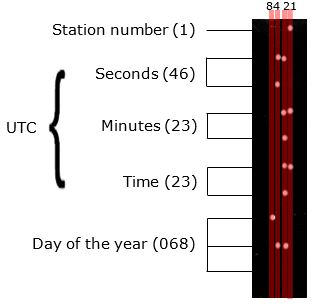

In [14]:
df_master = pd.read_csv(resultDir + 'result_master.csv')
filter_df_num = df_master[df_master['processed_image_class']=='dot']
selected_rows_num = filter_df_num.sample(sample_size)
selected_rows_drop = selected_rows_num.drop(['fmin','max_depth','time_quality','Lat','Lng'], axis=1)
print(selected_rows_drop)

        Directory Subdirectory       filename processed_image_class  \
7432  R014207978F          328  Image0323.png                   dot   
1180  R014207907F          512  Image0353.png                   dot   
862   R014207979F          297  Image0206.png                   dot   
3116  R014207979F          291  Image0330.png                   dot   
6133  R014207940F          404  Image0224.png                   dot   

                Timestamp  Station_Number Station_Code  \
7432  1963-03-29 00:00:00             1.0          RES   
1180  1963-01-04 00:00:00             5.0          COL   
862   1963-01-02 00:00:00             9.0          SOL   
3116  1963-01-22 00:00:00             3.0          OTT   
6133  1963-03-06 00:00:00             6.0          FTM   

                           Station_Name  
7432           Resolute Bay, NT, Canada  
1180        College, Fairbanks, AK, USA  
862   Falkland Islands (Islas Malvinas)  
3116                     Ottawa, Canada  
6133          

In [15]:
for _, row in selected_rows_num.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['filename']
    image_path = os.path.join(imageDir, directory, subdirectory, filename)
    
    if os.path.exists(image_path):
        print ("Image Path:", image_path)
        image = Image.open(image_path)
        image.show()
    else: 
        print ("Image not found", image_path)

Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207978F\328\Image0323.png
Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207907F\512\Image0353.png
Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207979F\297\Image0206.png
Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207979F\291\Image0330.png
Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207940F\404\Image0224.png


In [16]:
second_data = []
for i in range (5):
    print('\n\n')
    print ("Please read the metadata for each of the 5 images above and the values in the boxes below")
    print ("Write N/A if any of the values were not present or not easy to read.")
    Directory = input ("Add the Directory: ")
    Subdirectory = input("Add the Subdirectory: ")
    filename = input ("Add the png name: ")
    processed_image_class = input ("Add procssed image class: ")
    Timestamp = input ("Add the timestamp in the YY-MM-DD formart: ")
    Station_Number = input ("station number: ")
    second_data.append([Directory, Subdirectory, filename, processed_image_class, Timestamp, Station_Number])
with open ('L:/DATA/Alouette_I/BATCH_I_Run2/07_Accuracy/BatchI_dot_QA.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Directory","Subdirectory", "filename","processed_image_class", "TimeStamp", "Station_Number"])
    for row in second_data:
        #row.insert(0, directory)
        #row.insert (1, subdirectory)
        print(row)
        writer.writerow(row)




Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207978F
Add the Subdirectory: 328
Add the png name: Image0323.png
Add procssed image class: dot
Add the timestamp in the YY-MM-DD formart: 1963-01-11
station number: 1



Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207907F
Add the Subdirectory: 512
Add the png name: Image0353.png
Add procssed image class: dot
Add the timestamp in the YY-MM-DD formart: 1963-01-21
station number: 8



Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207979F
Add the Subdirectory: 297
Add the png name: Image0206.png
Add procssed image class: dot
Add the times

Total number of dot scanned Ionograms: 7784
Number of Images Analyzed: 10
Number of ionograms categorized correctly: 0
Estimated Success Rate out of 7784 with consistent results: 0


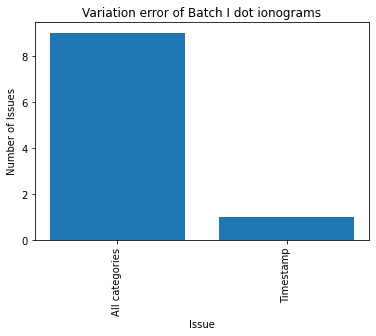

     Directory  Subdirectory       Filename
0  R014207940F           339  Image0150.png
1  R014207979F           394  Image0062.png
2  R014207929F           480  Image0242.png
3  R014207929F           476  Image0003.png
4  R014207907F           508      Image0119
6  R014207907F           512  Image0353.png
7  R014207979F           297  Image0206.png
8  R014207979F           291  Image0330.png
9  R014207940F           404  Image0224.png


In [7]:
#Total Number of dot Categories
df_master = pd.read_csv(resultDir + 'result_master.csv')
filter_df_dot = df_master[df_master['processed_image_class']=='dot']
total_df_master = len(filter_df_dot)
print ('Total number of dot scanned Ionograms:', total_df_master)

#Total number of Ionograms analyzed
df_dot = pd.read_csv("L:/DATA/Alouette_I/BATCH_I_Run2/07_Accuracy/BatchI_dot_QA.csv")
total_len = len(df_dot)
print ('Number of Images Analyzed:', total_len)


# filtering out correct categories
df_dot= df_dot.loc[df_dot['Issue'] != 'None']
filtered_down_len = len(df_dot)
print('Number of ionograms categorized correctly:', total_len - filtered_down_len)

#Estimated success rate
success_rate = (total_len - filtered_down_len)/total_len
Estimation = round(success_rate*total_df_master)
print('Estimated Success Rate out of 7784 with consistent results:', Estimation)

#Plotting the variation of issues
issue_counts_dot = df_dot["Issue"].value_counts()
plt.bar(issue_counts_dot.index, issue_counts_dot.values)
plt.title ("Variation error of Batch I dot ionograms")
plt.xlabel("Issue")
plt.ylabel("Number of Issues")
plt.xticks(rotation=90)
plt.show()

# Number of All categories error
df_dot = df_dot.loc[df_dot['Issue'] == 'All categories']
print(df_dot.loc[:,["Directory","Subdirectory", "Filename"]])

## NUM 2

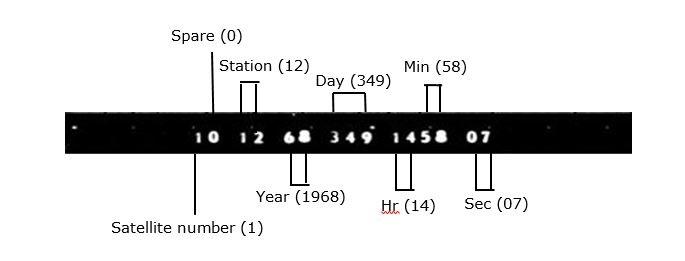

In [9]:
df_master = pd.read_csv(resultDir + 'result_master.csv')
filter_df_num = df_master[df_master['processed_image_class']=='num2']
selected_rows_num = filter_df_num.sample(sample_size)
selected_rows_drop = selected_rows_num.drop(['fmin','max_depth','time_quality','Lat','Lng'], axis=1)
print(selected_rows_drop)

         Directory Subdirectory filename processed_image_class  \
255947  R014207840     3041-50A   67.png                  num2   
216245  R014207821     3356-A38  234.png                  num2   
144506  R014207842     3251-38A  134.png                  num2   
272230  R014207816     3372-A38   23.png                  num2   
246557  R014207840     3033-50A  247.png                  num2   

                  Timestamp  Station_Number Station_Code  \
255947  1965-12-31 14:12:35            50.0          OTT   
216245  1965-11-03 08:52:35            38.0          SOL   
144506  1965-07-13 00:12:40            38.0          SOL   
272230  1966-01-26 20:39:00            38.0          SOL   
246557  1965-12-14 17:42:18            50.0          OTT   

                             Station_Name  
255947                     Ottawa, Canada  
216245  Falkland Islands (Islas Malvinas)  
144506  Falkland Islands (Islas Malvinas)  
272230  Falkland Islands (Islas Malvinas)  
246557                

In [10]:
for _, row in selected_rows_num.iterrows():
    directory = row['Directory']
    subdirectory = row ['Subdirectory']
    filename = row ['filename']
    image_path = os.path.join(imageDir, directory, subdirectory, filename)
    
    if os.path.exists(image_path):
        print ("Image Path:", image_path)
        image = Image.open(image_path)
        image.show()
    else: 
        print ("Image not found", image_path)

Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207840\3041-50A\67.png
Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207821\3356-A38\234.png
Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207842\3251-38A\134.png
Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207816\3372-A38\23.png
Image Path: L:/DATA/Alouette_I/BATCH_I_Run2/04_processed/R014207840\3033-50A\247.png


In [11]:
second_data = []
for i in range (5):
    print('\n\n')
    print ("Please read the metadata for each of the 5 images above and the values in the boxes below")
    print ("Write N/A if any of the values were not present or not easy to read.")
    Directory = input ("Add the Directory: ")
    Subdirectory = input("Add the Subdirectory: ")
    filename = input ("Add the png name: ")
    processed_image_class = input ("Add procssed image class: ")
    Timestamp = input ("Add the timestamp in the YY-MM-DD formart: ")
    Station_Number = input ("station number: ")
    second_data.append([Directory, Subdirectory, filename, processed_image_class, Timestamp, Station_Number])
with open ('L:/DATA/Alouette_I/BATCH_I_Run2/07_Accuracy/BatchI_num2_QA.csv', 'a', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["Directory","Subdirectory", "filename","processed_image_class", "TimeStamp", "Station_Number"])
    for row in second_data:
        #row.insert(0, directory)
        #row.insert (1, subdirectory)
        print(row)
        writer.writerow(row)




Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207840
Add the Subdirectory: 3041-50A
Add the png name: 67.png
Add procssed image class: num2
Add the timestamp in the YY-MM-DD formart:  1965-12-31 14:12:35
station number: 50



Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207821
Add the Subdirectory: 3356-A38
Add the png name: 234.png
Add procssed image class: num2
Add the timestamp in the YY-MM-DD formart: 1965-11-03 08:52:35
station number: 38



Please read the metadata for each of the 5 images above and the values in the boxes below
Write N/A if any of the values were not present or not easy to read.
Add the Directory: R014207842
Add the Subdirectory: 3251-38A
Add the png name: 134.png
Add procssed image class: n